# New heading

# Set Up

In [35]:
import importlib
import setup as su
importlib.reload(su)

<module 'setup' from '/Users/jinli/Projects/FAUI/Art_Recognition/trial_run/setup.py'>

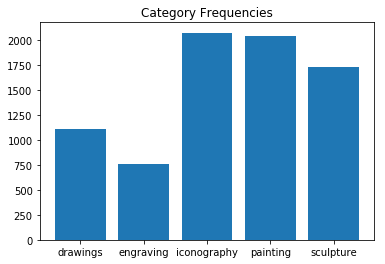

In [36]:
su.view_freq(su.categories, su.train_path)

/Users/jinli/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


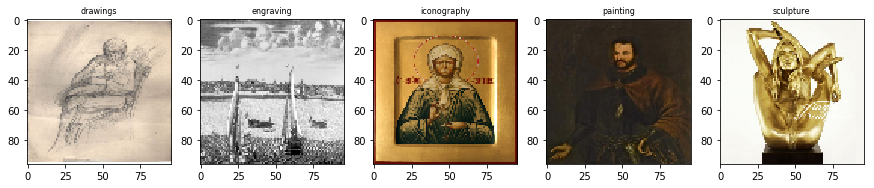

In [37]:
su.view_images(su.categories, su.train_path)

In [38]:
training_data, test_data = su.get_file_names(
    su.categories, su.train_path, su.test_path)

In [39]:
su.move_bad_file(training_data, su.train_path, su.corrupt_path)

/Users/jinli/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6029312 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Users/jinli/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1311848 bytes but only got 785. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Users/jinli/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 8. 
  warnings.warn(str(msg))


# Mini-Batch

In [40]:
# currently scrap work, will do a lot more documentation and explanation afterwards
batch_size = 100 
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator()

train_generator = train_datagen.flow_from_directory(
    su.train_path,
    target_size=(su.height, su.width),
    batch_size=batch_size,
    classes=su.categories,
    class_mode="categorical",
)

Found 7721 images belonging to 5 classes.


In [41]:
from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(
    n_clusters=len(su.categories),
    random_state=42,
    batch_size=batch_size,
)

In [48]:
%%time

count = 0
for data_batch, labels_batch in train_generator:
    if count > 70:
        break
    if count % 10 == 0:
        print (count)
    if data_batch.shape[0] == batch_size:
        data_batch = data_batch.reshape(batch_size, -1)
        kmeans.partial_fit(data_batch)
        count += 1

0
10
20
30
40
50


/Users/jinli/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 6029312 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Users/jinli/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:763: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1311848 bytes but only got 785. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/Users/jinli/anaconda3/lib/python3.6/site-packages/PIL/TiffImagePlugin.py:780: UserWarning: Corrupt EXIF data.  Expecting to read 12 bytes but only got 8. 
  warnings.warn(str(msg))


60
70
CPU times: user 50.3 s, sys: 2.62 s, total: 52.9 s
Wall time: 1min


In [54]:
kmeans.predict(data_batch[0].reshape(1, -1))

array([2], dtype=int32)